In [1]:
import warnings

In [2]:
import numpy as np
import pandas as pd

In [115]:
import plotly.graph_objects as go
import plotly.express as px

In [4]:
warnings.filterwarnings("ignore")

In [5]:
# df = pd.read_csv('youtube_data.csv')

In [6]:
# df

In [7]:
# df.isnull().sum()

In [8]:
# df.info()

In [9]:
# index = df.shape[0]

In [10]:
# def re(x):
#    return str(x).replace(',', '')

In [11]:
# df['subscriber'] = df['subscriber'].apply(re)

In [12]:
# df['view'] = df['view'].apply(re)

In [13]:
# df['last_subscriber_30'] = df['last_subscriber_30'].apply(re)

In [14]:
# df['last_view_30'] = df['last_view_30'].apply(re)

In [15]:
# df = df.astype({ "subscriber": int, "view": int, "last_subscriber_30": int, "last_view_30": int })

In [16]:
# month_earnings_min = []

In [17]:
# month_earnings_max = []

In [18]:
# for i in range(0, index):
#     month_earnings_min.append(eval(df.loc[i, 'month_earnings'])[0].replace('$', ''))
#     month_earnings_max.append(eval(df.loc[i, 'month_earnings'])[1].replace('$', ''))

In [19]:
# df['month_earnings_min'] = month_earnings_min

In [20]:
# df['month_earnings_max'] = month_earnings_max

In [21]:
# for i in range(0, index):
#     mem = df.loc[i, 'month_earnings_min']
#     if mem == '':
#         df.loc[i, 'month_earnings_min'] = 0
#     else:
#         if not type(mem) == int:
#             if 'K' in mem:
#                 mem = mem.replace('K', '')
#                 mem = int(float(mem) * 1000)
#                 df.loc[i, 'month_earnings_min'] = mem
#             else:
#                 mem = int(mem)
#                 df.loc[i, 'month_earnings_min'] = mem

In [22]:
# for i in range(0, index):
#     mem = df.loc[i, 'month_earnings_max']
#     if mem == '':
#         df.loc[i, 'month_earnings_max'] = 0
#     else:
#         if not type(mem) == int:
#             if 'M' in mem:
#                 mem = mem.replace('M', '')
#                 mem = int(float(mem) * 1000 * 1000)
#                 df.loc[i, 'month_earnings_max'] = mem
#             elif 'K' in mem:
#                 mem = mem.replace('K', '')
#                 mem = int(float(mem) * 1000)
#                 df.loc[i, 'month_earnings_max'] = mem
#             else:
#                 mem = int(mem)
#                 df.loc[i, 'month_earnings_max'] = mem

In [23]:
# df

In [24]:
# df = df.astype({ "month_earnings_min": int, "month_earnings_max": int })

In [25]:
# df.info()

In [26]:
# df.to_csv('youtube_data_eda.csv', index=False)

In [27]:
# df = pd.read_csv('youtube_data_eda.csv')

In [28]:
# df

In [29]:
# index = df.shape[0]

In [30]:
# nindex = df[df['overviewSubscribers'].isna()].index

In [31]:
# for i in nindex:
#     df.at[i, 'overviewSubscribers'] = []

In [32]:
# overviewSubscribers_date = []

In [33]:
# overviewSubscribers_count = []

In [34]:
# for i in range(0, index):
#     yde = df.loc[i, ['overviewSubscribers']][0]
#     if not yde == []:
#         yde = eval(yde)
#         a = []
#         b = []
#         for element in yde:
#             a.append(element[0])
#             b.append(element[1])
#         overviewSubscribers_date.append(a)
#         overviewSubscribers_count.append(b)
#     else:
#         overviewSubscribers_date.append([])
#         overviewSubscribers_count.append([])

In [35]:
# df['overviewSubscribers_date'] = overviewSubscribers_date

In [36]:
# df['overviewSubscribers_count'] = overviewSubscribers_count

In [37]:
# nindex = df[df['overviewVideoViews'].isna()].index

In [38]:
# for i in nindex:
#     df.at[i, 'overviewVideoViews'] = []

In [39]:
# overviewVideoViews_date = []

In [40]:
# overviewVideoViews_count = []

In [41]:
# for i in range(0, index):
#     yde = df.loc[i, ['overviewVideoViews']][0]
#     if not yde == []:
#         yde = eval(yde)
#         a = [] 	[2016-10-29
#         b = []
#         for element in yde:
#             a.append(element[0])
#             b.append(element[1])
#         overviewVideoViews_date.append(a)
#         overviewVideoViews_count.append(b)
#     else:
#         overviewVideoViews_date.append([])
#         overviewVideoViews_count.append([])

In [42]:
# df['overviewVideoViews_date'] = overviewVideoViews_date

In [43]:
# df['overviewVideoViews_count'] = overviewVideoViews_count

In [44]:
# df.to_csv('youtube_data_eda.csv', index=False)

In [45]:
df = pd.read_csv('youtube_data_eda.csv')

In [46]:
df

,profile_name,subscriber,view,video,country,category,since,month_earnings,last_subscriber_30,last_view_30,overviewSubscribers,overviewVideoViews,month_earnings_min,month_earnings_max,overviewSubscribers_date,overviewSubscribers_count,overviewVideoViews_date,overviewVideoViews_count
0,Rotana,24500000,24034368999,9078,Saudi Arabia (SA),Music,2012,"['$110K', '$658K']",200000,292453337,"[['2016-10-29', '3282041'], ['2016-11-27', '33...","[['2016-10-29', '2397995058'], ['2016-11-27', ...",110000,658000,"['2016-10-29', '2016-11-27', '2016-12-19', '20...","['3282041', '3394305', '3477819', '3594154', '...","['2016-10-29', '2016-11-27', '2016-12-19', '20...","['2397995058', '2517865902', '2599146119', '28..."
1,Mmoshaya,23200000,18468679361,1240,Saudi Arabia (SA),People & Blogs,2010,"['$12.8K', '$76.7K']",0,34076848,"[['2016-10-27', '1139825'], ['2016-11-23', '12...","[['2016-10-27', '340585176'], ['2016-11-23', '...",12800,76700,"['2016-10-27', '2016-11-23', '2016-12-23', '20...","['1139825', '1236408', '1386016', '1491742', '...","['2016-10-27', '2016-11-23', '2016-12-23', '20...","['340585176', '385899062', '454580517', '52517..."
2,شبكة العاب العرب | Arab Games Network,22300000,10024125023,7460,Saudi Arabia (SA),Gaming,2013,"['$17K', '$102K']",100000,45416699,"[['2016-11-14', '213303'], ['2017-01-19', '250...","[['2016-11-14', '22399237'], ['2017-01-19', '3...",17000,102000,"['2016-11-14', '2017-01-19', '2017-05-01', '20...","['213303', '250934', '313996', '329298', '3880...","['2016-11-14', '2017-01-19', '2017-05-01', '20...","['22399237', '30860047', '40045340', '42931914..."
3,Katakit Baby Tv,20200000,8517744618,231,Saudi Arabia (SA),Music,2010,"['$50K', '$300K']",200000,133417200,"[['2021-07-18', '9780000'], ['2021-08-31', '10...","[['2021-07-18', '3675162082'], ['2021-08-31', ...",50000,300000,"['2021-07-18', '2021-08-31', '2021-09-27', '20...","['9780000', '10100000', '10300000', '10600000'...","['2021-07-18', '2021-08-31', '2021-09-27', '20...","['3675162082', '3853558289', '3960178435', '40..."
4,ماشا و الدب,18300000,10158387659,1482,Saudi Arabia (SA),Shows,2017,"['$30.8K', '$185K']",100000,82126847,"[['2017-05-29', '967'], ['2017-06-18', '5106']...","[['2017-05-29', '135030'], ['2017-06-18', '973...",30800,185000,"['2017-05-29', '2017-06-18', '2017-07-09', '20...","['967', '5106', '14636', '39196', '52839', '75...","['2017-05-29', '2017-06-18', '2017-07-09', '20...","['135030', '973753', '3369492', '10535464', '1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,Thunayyan Khalid!,3890000,755411009,595,Canada (CA),Entertainment,2010,"['$170', '$1.03K']",0,455754,"[['2016-10-29', '1440927'], ['2016-11-24', '15...","[['2016-10-29', '195190546'], ['2016-11-24', '...",170,1030,"['2016-10-29', '2016-11-24', '2016-12-28', '20...","['1440927', '1517067', '1626937', '1748880', '...","['2016-10-29', '2016-11-24', '2016-12-28', '20...","['195190546', '209416570', '232033553', '25103..."
3581,دانية شافعي Danyah Shafei,2830000,1160145940,329,NaN,Film & Animation,2013,"['$1.03K', '$6.21K']",0,2757922,"[['2016-10-29', '396331'], ['2016-11-23', '439...","[['2016-10-29', '271407735'], ['2016-11-23', '...",1030,6210,"['2016-10-29', '2016-11-23', '2017-01-28', '20...","['396331', '439363', '490322', '653386', '8683...","['2016-10-29', '2016-11-23', '2017-01-28', '20...","['271407735', '296874955', '330954677', '41969..."
3582,25esports,348000,13915866,56,NaN,People & Blogs,2017,"['$78', '$471']",5000,209635,"[['2021-06-17', '230000'], ['2021-07-30', '241...","[['2021-06-17', '4042277'], ['2021-07-30', '48...",78,471,"['2021-06-17', '2021-07-30', '2021-09-06', '20...","['230000', '241000', '250000', '259000', '2650...","['2021-06-17', '2021-07-30', '2021-09-06', '20...","['4042277', '4848914', '5570774', '6866796', '..."
3583,Barry | باري,1780000,23957794,1,NaN,People & Blogs,2017,"['$24', '$144']",0,64270,"[['2017-03-25', '78157'], ['2017-04-17', '1044...","[['2017-03-25', '172750'], ['2017-04-17', '716...

In [47]:
temp = df.head(1)

In [48]:
overviewVideoViews_date = eval(temp['overviewVideoViews_date'][0])

In [49]:
overviewVideoViews_count = eval(temp['overviewVideoViews_count'][0])

In [50]:
df = pd.DataFrame({ 'overviewVideoViews_date' : overviewVideoViews_date, 'overviewVideoViews_count' : overviewVideoViews_count})

In [51]:
df

,overviewVideoViews_date,overviewVideoViews_count
0,2016-10-29,2397995058
1,2016-11-27,2517865902
2,2016-12-19,2599146119
3,2017-01-19,2805885357
4,2017-03-11,2938467666
5,2017-04-24,3152626024
6,2017-06-02,3334260266
7,2017-07-16,3489798801
8,2017-08-07,3621016124
9,2017-08-29,3735101255


In [108]:
fig = px.line(df, x='overviewVideoViews_date', y="overviewVideoViews_count")

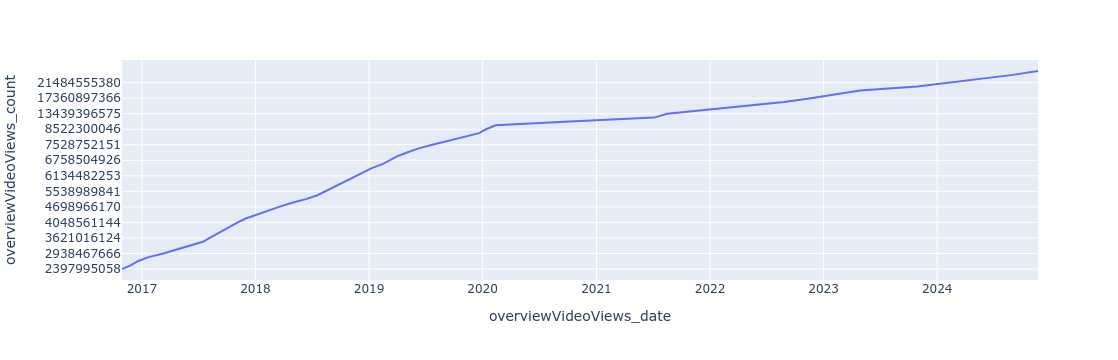

In [110]:
fig.show()

In [120]:
fig = go.Figure([go.Scatter(x=df['overviewVideoViews_date'], y=df['overviewVideoViews_count'])])

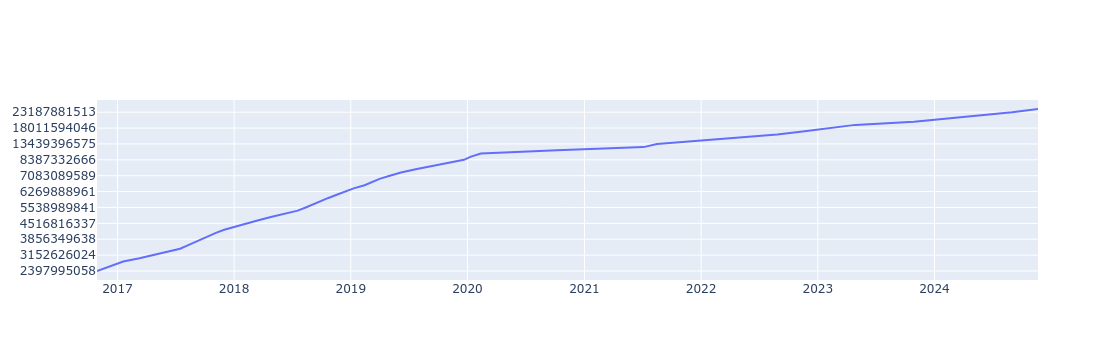

In [122]:
fig.show()